<a href="https://colab.research.google.com/github/AvinRai/Avin/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving child_mortality.csv to child_mortality.csv
Saving countries.csv to countries.csv
Saving fertility.csv to fertility.csv
Saving life_expectancy.csv to life_expectancy.csv
Saving population.csv to population.csv
Saving poverty.csv to poverty.csv


# **Part 1**

In [ ]:
# Q1: Filtering populations to before 2021 and outputting the first 3 rows
pop = pd.read_csv('population.csv')
pop_filtered = pop[pop['time'] < 2021]
pop_filtered.head(3)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000


In [ ]:
# Q2: Finding the population of Bangladesh in 1972
bgdpopulation1972 = pop[(pop['geo'] == 'bgd') & (pop['time'] == 1972)]
bgdpopulation1972['population_total']

,population_total
4687,66625706


In [ ]:
# Q3: Creating a table that has the population of Bangladesh every five years
b_five = pop[(pop['geo'] == 'bgd') & (pop['time'] % 5 == 0)]
b_five[b_five['time'] == 1990]

,geo,time,population_total
4705,bgd,1990,103171957


In [ ]:
# Q4: Creating initial and changed variables
initial = b_five[(b_five['time'] >= 1970) & (b_five['time'] <= 2015)]['population_total'].tolist()
changed = b_five[(b_five['time'] >= 1975) & (b_five['time'] <= 2020)]['population_total'].tolist()


growth_rates = dict()
for i in range(10):
  growth_rates[1970 + 5 * i] = f"{((((changed[i]/initial[i]) ** (1/5)) - 1) * 100):.2f}%"

gr = pd.DataFrame([growth_rates])
gr

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,1.75%,2.59%,2.65%,2.60%,2.22%,2.08%,1.72%,1.20%,1.15%,1.06%


In [ ]:
# Q5: Finding life expectancy in BGD in 1990
le = pd.read_csv('life_expectancy.csv')
le_filtered = le[(le['time'] < 2021) & (le['geo'] == 'bgd')]
le_filtered[le_filtered['time'] == 1990]

,geo,time,life_expectancy_years
4452,bgd,1990,58.25


Text(0, 0.5, 'Life Expectancy By Years')

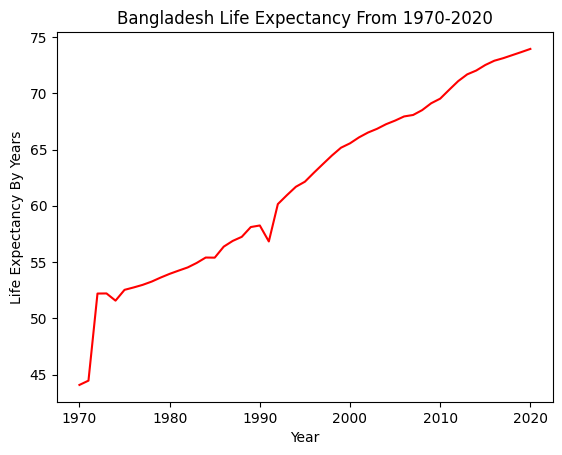

In [ ]:
# Q6: Drawing a line graph of BGD life expectancy starting from 1970
le_filtered = le_filtered[le_filtered['time'] >= 1970]
le_columns = le_filtered['time'].tolist()
le_rows = le_filtered['life_expectancy_years'].tolist()

plt.plot(le_columns, le_rows, color='red')
plt.title('Bangladesh Life Expectancy From 1970-2020')
plt.xlabel('Year')
plt.ylabel('Life Expectancy By Years')

In [ ]:
# Q7: Fertility Rate in 1990
fr = pd.read_csv('fertility.csv')
fr1990 = fr[fr['time'] == 1990]['children_per_woman_total_fertility'].mean()
fr1990

3.9407920792079207

Text(0, 0.5, 'Fertility (Avg # of Children per Woman)')

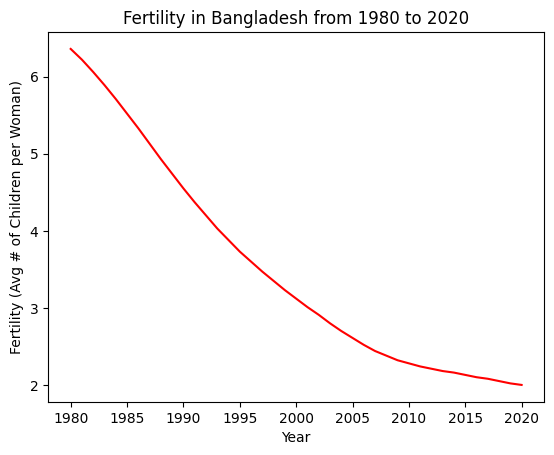

In [ ]:
# Q8: Drawing a line graph of the fertiligy rate from 1980 to 2020 in BGD
fr_filtered = fr[(fr['time'] >= 1980) & (fr['time'] <= 2020) * (fr['geo'] == 'bgd')]
fr_columns = fr_filtered['time'].tolist()
fr_rows = fr_filtered['children_per_woman_total_fertility'].tolist()
plt.plot(fr_columns, fr_rows, color='red')
plt.title('Fertility in Bangladesh from 1980 to 2020')
plt.xlabel('Year')
plt.ylabel('Fertility (Avg # of Children per Woman)')

Text(0, 0.5, 'Child Morality (Deaths per 1000 Born)')

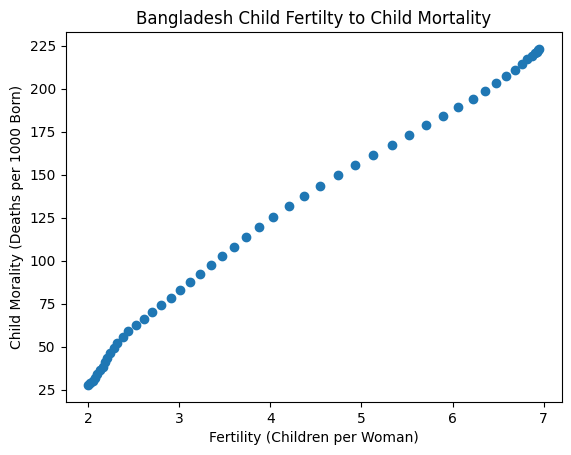

In [ ]:
# Q9: Drawing scatter diagram of BGD's total fertility and child mortality starting from 1970
cm = pd.read_csv('child_mortality.csv')
fr_filtered = fr[(fr['geo'] == 'bgd') & (fr['time'] >= 1970) & (fr['time'] <= 2020)]
cm_filtered = cm[(cm['geo'] == 'bgd') & (cm['time'] >= 1970) & (cm['time'] <= 2020)]

x = fr_filtered['children_per_woman_total_fertility'].tolist()
y = cm_filtered['child_mortality_0_5_year_olds_dying_per_1000_born'].tolist()
plt.scatter(x, y)
plt.title('Bangladesh Child Fertilty to Child Mortality')
plt.xlabel('Fertility (Children per Woman)')
plt.ylabel('Child Morality (Deaths per 1000 Born)')

Countries in 1962 with a Fertility Rate Between 3.5 and 4.5:  17
Countries in 2010 with a Fertility Rate Between 3.5 and 4.5:  18


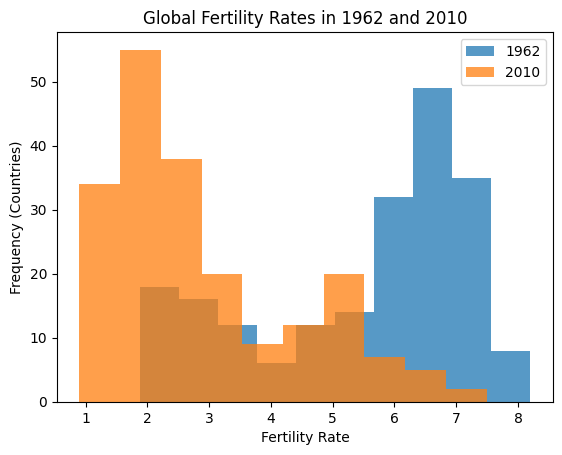

In [ ]:
# Q10: Create two overalid histograms for fertility rates in 1962 and 2010
# and check if there were roughly the same number of countries with a fertility
# rate between 3.5 and 4.5 in both 1962 and 2010
fr1962 = fr[fr['time'] == 1962]['children_per_woman_total_fertility']
fr2010 = fr[fr['time'] == 2010]['children_per_woman_total_fertility']

plt.hist(fr1962, alpha=0.75)
plt.hist(fr2010, alpha=0.75)
plt.title('Global Fertility Rates in 1962 and 2010')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency (Countries)')
plt.legend(['1962', '2010'])

frrange1962 = len(fr1962[(fr1962 >= 3.5) & (fr1962 <= 4.5)])
frrange2010 = len(fr2010[(fr2010 >= 3.5) & (fr2010 <= 4.5)])

print("Countries in 1962 with a Fertility Rate Between 3.5 and 4.5: ", frrange1962)
print("Countries in 2010 with a Fertility Rate Between 3.5 and 4.5: ", frrange2010)

In [ ]:
# Q11: Checking if 20% of countries in 1962 had a fertility rate below 3
numOfCountries = len(fr1962)
numCountriesBelow3FR1962 = len(fr1962[fr1962 < 3])
print("Percent of countries below fertility rate of 3: ", f'{(numCountriesBelow3FR1962 / numOfCountries * 100):.2f}%')

Percent of countries below fertility rate of 3:  16.34%


In [ ]:
# Q12: Checking if at least half of the countries had between a fertility rate of 5 and 8 in 1962
numCountriesBetween5and8in1962 = len(fr1962[(fr1962 >= 5) & (fr1962 <= 8)])
print("Percent of countries with a fertility rate between 5 and 8 in 1962: ", f'{(numCountriesBetween5and8in1962 / numOfCountries * 100):.2f}%')

Percent of countries with a fertility rate between 5 and 8 in 1962:  68.32%


In [ ]:
# Q13: Checking if about 40% of countries had a fertility rate between 1.5 and 2
numCountriesBetween1o5and2 = len(fr2010[(fr2010 >= 1.5) & (fr2010 <= 2)])
print("Percent of countries with a fertility rate between 1.5 and 2 in 2010: ", f'{(numCountriesBetween1o5and2/numOfCountries*100):.2f}%')

Percent of countries with a fertility rate between 1.5 and 2 in 2010:  22.77%


In [ ]:
# Q14: Check if at least half the countries had a fertility rate below 3 in 2010
numCountriesBelow3in2010 = len(fr2010[fr2010 < 3])
print("Percent of countries below a fertility rate of 3 in 2010: ", f'{(numCountriesBelow3in2010/numOfCountries*100):.2f}%')

Percent of countries below a fertility rate of 3 in 2010:  65.84%


In [ ]:
# Q15: Checking if more countries had a fertility rate above 3 in 1962 in 2010
numCountriesOver3in1962 = len(fr1962[fr1962 > 3])
numCountriesOver3in2010 = len(fr2010[fr2010 > 3])
print('Num of countries in 1962 over a fertility rate of 3: ', numCountriesOver3in1962)
print('Num of countries in 2010 over a fertility rate of 3: ', numCountriesOver3in2010)
print("To answer commented question: ", numCountriesOver3in1962 > numCountriesBelow3in2010)

Num of countries in 1962 over a fertility rate of 3:  169
Num of countries in 2010 over a fertility rate of 3:  68
To answer commented question:  True


Text(0, 0.5, 'World Population')

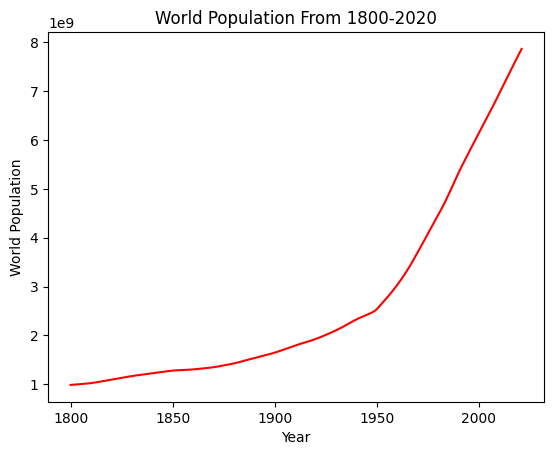

In [ ]:
# Q16: Drawing a line plot of the world population from 1800 to 2020
world_pop = pop[(pop['time'] >= 1800) & (pop['time'] <= 2021)]
world_pop = world_pop.drop('geo', axis=1)
world_pop = world_pop.groupby(['time']).sum()
years = world_pop.index.tolist()
world_pop = world_pop['population_total'].tolist()
plt.plot(years, world_pop, color='red')
plt.title('World Population From 1800-2020')
plt.xlabel('Year')
plt.ylabel('World Population')

# **Part 2**

In [ ]:
# Q1: Create stats_for_year method
def stats_for_year(year: int) -> pd.DataFrame:
  pop_filtered = pop[pop['time'] == year]
  fr_filtered = fr[fr['time'] == year]
  cm_filtered = cm[cm['time'] == year]

  merged_data = pd.merge(pop_filtered[['geo', 'population_total']],
                         fr_filtered[['geo', 'children_per_woman_total_fertility']],
                         on='geo')
  merged_data = pd.merge(merged_data, cm_filtered[['geo', 'child_mortality_0_5_year_olds_dying_per_1000_born']], on='geo')

  final_data = merged_data[merged_data['geo'].isin(get_big_50_2020())]

  return final_data

def get_big_50_2020() -> list:
  sorted_pop = pop[pop['time'] == 2020]
  sorted_pop = sorted_pop.sort_values('population_total', ascending=False)[:50]
  return sorted_pop['geo'].tolist()

In [ ]:
stats_for_year(2020)

,geo,population_total,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born
0,afg,38928341,4.04,58.08
1,ago,32866268,5.41,72.29
4,arg,45195777,2.23,9.40
14,bgd,164689383,2.00,27.70
22,bra,212559409,1.67,13.47
28,can,37742157,1.56,4.89
31,chn,1439323774,1.65,8.09
34,cod,89561404,5.72,84.53
36,col,50882884,1.78,13.48
43,deu,83783945,1.49,3.24


In [ ]:
# Q2: Create pop_by_decade dataframe
def pop_by_decade() -> pd.DataFrame:
  decades = pd.DataFrame({
      'decade': [1960, 1970, 1980, 1990, 2000, 2010, 2020]
  })
  decades['population'] = decades['decade'].apply(pop_for_year)
  return decades

def pop_for_year(year: int) -> int:
  stats = stats_for_year(year)
  totalPop = stats['population_total'].sum()
  return totalPop

In [ ]:
pop_by_decade()

,decade,population
0,1960,2635123897
1,1970,3221457416
2,1980,3890044418
3,1990,4656339803
4,2000,5377062169
5,2010,6064674132
6,2020,6765161289


In [ ]:
# Q3: Find where Samoa is
cn = pd.read_csv('countries.csv')
cn_filtered = cn[cn['country'].isin(pop['geo'])]
cn_filtered = cn_filtered[['country', 'name', 'world_6region']]

samoa_region = cn_filtered.loc[cn_filtered['name'] == 'Samoa', 'world_6region'].values[0]

print("Samoa belongs to", samoa_region)

Samoa belongs to east_asia_pacific


In [ ]:
# Q4 Creating region_counts dataframe

stats_for_2020 = stats_for_year(2020)

region_counts = pd.merge(cn[['world_6region', 'country']], stats_for_2020['geo'], left_on='country', right_on='geo')
region_counts = region_counts.groupby('world_6region')['country'].count().reset_index(name='count')

europe_central_asia_count = region_counts.loc[region_counts['world_6region'] == 'europe_central_asia']['count'].values[0]
print("europe_central_asia count as", europe_central_asia_count)

europe_central_asia count as 10


Text(0, 0.5, 'Child Mortality Rate (Under 5 per 1000 Born)')

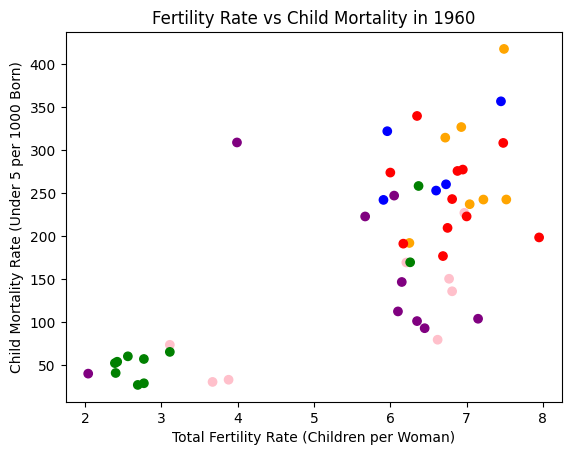

In [ ]:
# Q5 Create a scatter diagram that compares total fertility rate and child mortality rate for each country in 1960
stats_for_1960 = stats_for_year(1960)
regions = pd.merge(cn[['country', 'world_6region']], stats_for_1960, left_on='country', right_on='geo')

colors = {
    'south_asia': 'blue',
    'europe_central_asia': 'green',
    'sub_saharan_africa': 'red',
    'east_asia_pacific': 'purple',
    'middle_east_north_africa': 'orange',
    'latin_america_caribbean': 'brown',
    'america': 'pink'
}

plt.scatter(regions['children_per_woman_total_fertility'], regions['child_mortality_0_5_year_olds_dying_per_1000_born'], c=regions['world_6region'].apply(lambda x: colors[x]))
plt.title('Fertility Rate vs Child Mortality in 1960')
plt.xlabel('Total Fertility Rate (Children per Woman)')
plt.ylabel('Child Mortality Rate (Under 5 per 1000 Born)')

In [ ]:
# Q10 Creating latest_poverty dataframe
pov = pd.read_csv('poverty.csv')
latest_poverty = pov.sort_values('extreme_poverty_percent_people_below_125_a_day', ascending=False).groupby('geo').first().reset_index()
latest_poverty

,geo,time,extreme_poverty_percent_people_below_125_a_day
0,ago,2000,54.31
1,alb,2002,0.73
2,arg,2002,12.58
3,arm,2001,18.83
4,aus,2003,1.36
...,...,...,...
140,ven,2003,19.06
141,vnm,1993,63.76
142,yem,1998,10.47
143,zaf,2000,26.20


In [ ]:
# Q11 Creating recent_poverty_total dataframe

pop_2010 = pop[pop['time'] == 2010][['geo', 'population_total']]
recent_poverty_total = pd.merge(latest_poverty[['geo', 'extreme_poverty_percent_people_below_125_a_day']], pop_2010, on='geo')
recent_poverty_total.rename(columns={'extreme_poverty_percent_people_below_125_a_day': 'poverty_percent'}, inplace=True)
recent_poverty_total['poverty_total'] = recent_poverty_total['poverty_percent'] / 100 * recent_poverty_total['population_total']
recent_poverty_total

,geo,poverty_percent,population_total,poverty_total
0,arg,2,40895751,707496
1,arm,2,2877314,71933
2,bgd,43,147575433,63826375
3,blr,0,9420576,0
4,bgr,2,7425011,121770
...,...,...,...,...
60,gbr,1,63459801,640944
61,usa,2,309011469,5160492
62,ury,0,3359273,6719
63,vnm,4,87967655,3457129


In [ ]:
# Q12 Calculate poverty_percent and finidng world poverty percent in 2010
pov = pd.read_csv('poverty.csv')
latest_poverty = pov[pov['time'] == 2010]
print(len(latest_poverty))
pop_2010 = pop[pop['time'] == 2010][['geo', 'population_total']]

poverty_total_2010 = pd.merge(latest_poverty[['geo', 'extreme_poverty_percent_people_below_125_a_day']], pop_2010, on='geo')
poverty_total_2010.rename(columns={'extreme_poverty_percent_people_below_125_a_day': 'poverty_percent'}, inplace=True)
poverty_total_2010['poverty_total'] = (poverty_total_2010['poverty_percent'] / 100) * poverty_total_2010['population_total']

pop2010 = pop[pop['time'] == 2010]['population_total'].sum()
pov2010 = poverty_total_2010['poverty_total'].sum()
poverty_percent = pov2010/pop2010 * 100

print(poverty_total_2010.sort_values('poverty_total', ascending=False))
print(f'The world poverty percent in 2010 was {poverty_percent:.2f}%')

65
    geo  poverty_percent  population_total  poverty_total
22  ind               33        1234281163      403363084
7   chn                9        1368810604      125793695
42  nga               62         158503203       98319537
2   bgd               43         147575433       63826375
23  idn               18         241834226       43626894
..  ...              ...               ...            ...
48  rou                0          20471860              0
16  fin                0           5365784              0
47  pol                0          38329784              0
59  ukr                0          45792086              0
3   blr                0           9420576              0

[65 rows x 4 columns]
The world poverty percent in 2010 was 11.72%


In [ ]:
# Q13 Creating poverty_map and finding longitude of Argentina
poverty_map = pd.merge(cn[['country', 'latitude', 'longitude', 'name', 'world_6region']], recent_poverty_total[['geo', 'poverty_total']], left_on='country', right_on='geo')
poverty_map.drop(['country', 'geo'], axis=1, inplace=True)
arg_long = poverty_map[poverty_map['name'] == 'Argentina']['longitude'].values[0]
print(poverty_map)
print(f'The logitude of Argentina is {arg_long}')

     latitude  longitude          name             world_6region  \
0         -12         18        Angola        sub_saharan_africa   
1          41         20       Albania       europe_central_asia   
2         -34        -64     Argentina                   america   
3          40         45       Armenia       europe_central_asia   
4         -25        135     Australia         east_asia_pacific   
..        ...        ...           ...                       ...   
140         8        -66     Venezuela                   america   
141        16        108       Vietnam         east_asia_pacific   
142        16         48         Yemen  middle_east_north_africa   
143       -29         24  South Africa        sub_saharan_africa   
144       -14         28        Zambia        sub_saharan_africa   

     poverty_total  
0         12684778  
1            21521  
2          5144685  
3           541798  
4           301304  
..             ...  
140        5420653  
141       56088

Text(69.0, 22.0, 'India')

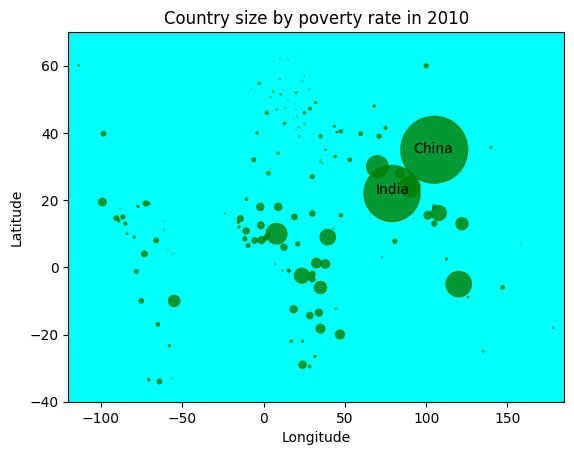

In [ ]:
# Q14 Drawing map of world
latitudes = poverty_map['latitude']
longitudes = poverty_map['longitude']

plt.axes().set_facecolor('aqua')
plt.scatter(longitudes, latitudes, s=poverty_map['poverty_total'] / 0.5e6, alpha=0.8, color='green')
plt.xlim(-120, 185)
plt.ylim(-40, 70)
plt.title('Country size by poverty rate in 2010')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

largest_poverty = poverty_map.nlargest(2, 'poverty_total')
plt.annotate(largest_poverty['name'].values[0], (largest_poverty['longitude'].values[0] - 13, largest_poverty['latitude'].values[0] - 1))
plt.annotate(largest_poverty['name'].values[1], (largest_poverty['longitude'].values[1] - 10, largest_poverty['latitude'].values[1]))

In [ ]:
# Q15 Obtaining the 10 countries with the largest number of people living in extreme poverty
cn.head()
largest = pd.merge(cn[['country', 'name']], poverty_total_2010[['geo', 'poverty_total']], left_on='country', right_on='geo')
largest.sort_values('poverty_total', ascending=False, inplace=True)
largest = largest.head(10)

largest

,country,name,geo,poverty_total
23,ind,India,ind,403363084
6,chn,China,chn,125793695
42,nga,Nigeria,nga,98319537
2,bgd,Bangladesh,bgd,63826375
22,idn,Indonesia,idn,43626894
36,mdg,Madagascar,mdg,18543643
40,mwi,Malawi,mwi,10491782
64,zmb,Zambia,zmb,10111969
38,mli,Mali,mli,7616477
45,npl,Nepal,npl,6412935


In [ ]:
# Q16 Creating poverty_timeline function

def poverty_timeline(country: str):
  code = cn[cn['name'] == country]['country'].values[0]
  pov_country = pov[pov['geo'] == code]
  pop_country = pop[pop['geo'] == code]
  merged = pd.merge(pov_country[['time', 'extreme_poverty_percent_people_below_125_a_day']], pop_country[['time', 'population_total']], on='time')
  merged['poverty_total'] = merged['extreme_poverty_percent_people_below_125_a_day'] * merged['population_total']
  years = merged['time']
  poverty_total = merged['poverty_total']

  plt.plot(years, poverty_total, color='red')
  plt.title(f'Poverty in {country}')
  plt.xlabel('Year')
  plt.ylabel('Poverty')

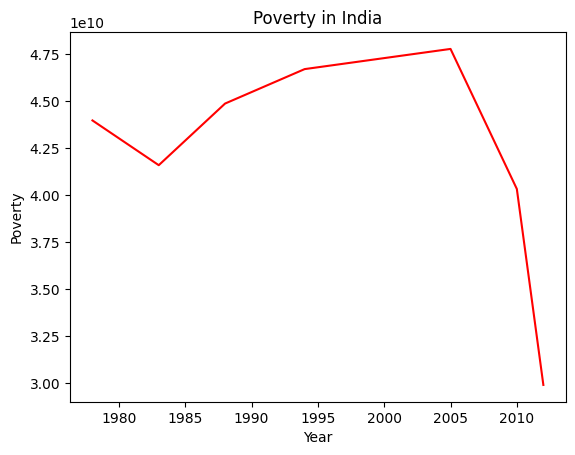

In [ ]:
poverty_timeline('India')

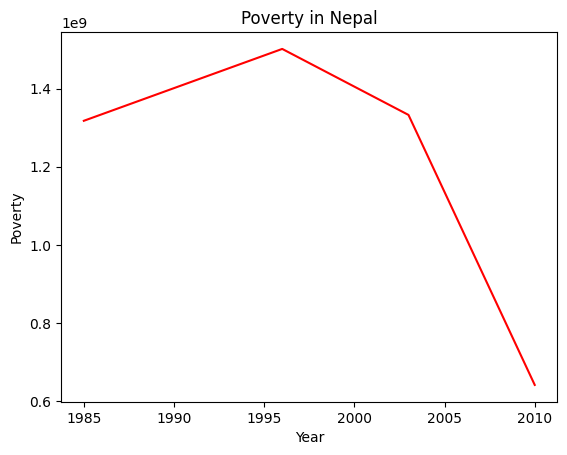

In [ ]:
poverty_timeline('Nepal')

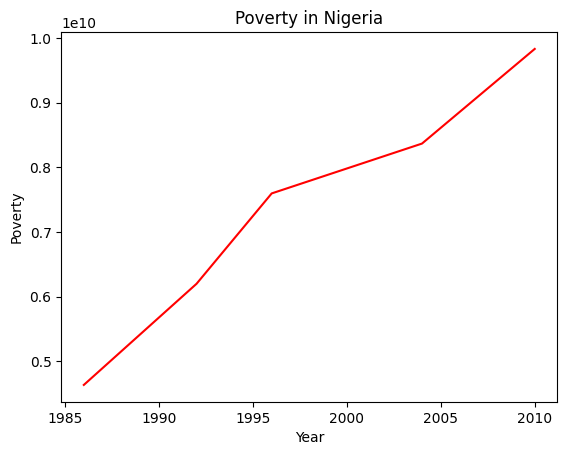

In [ ]:
poverty_timeline('Nigeria')

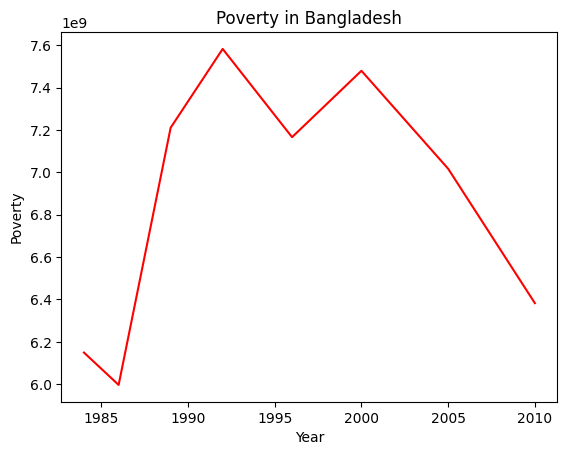

In [ ]:
poverty_timeline('Bangladesh')

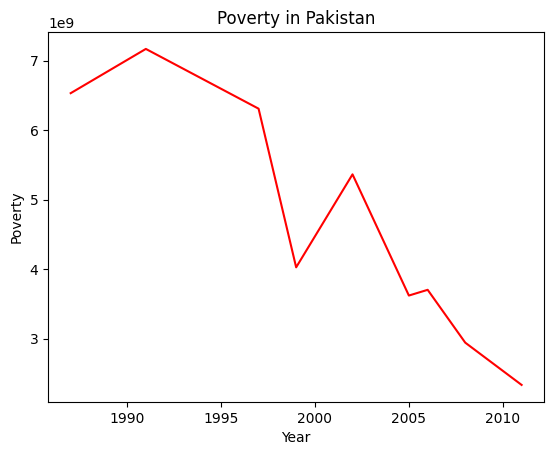

In [ ]:
poverty_timeline('Pakistan')

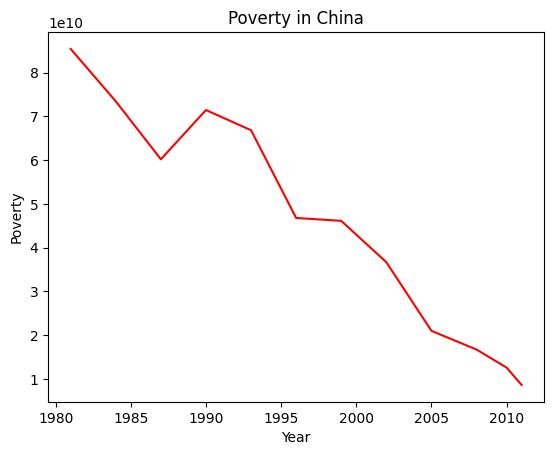

In [ ]:
poverty_timeline('China')

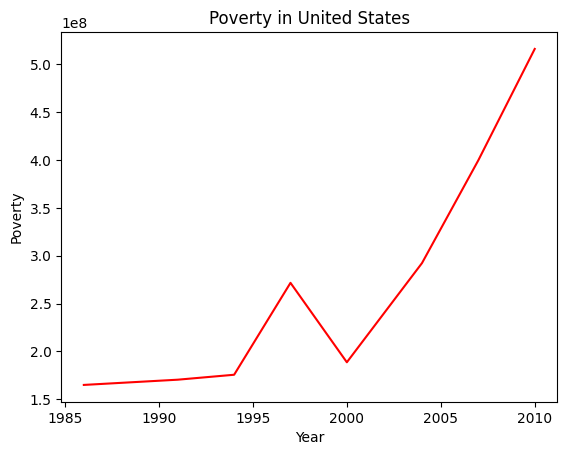

In [ ]:
poverty_timeline('United States')